<h1><center>Tutorial 4</h1>

<h2><center>Task 1</h2>

Write down the differential equation describing the system of chemical equations (assuming a volume of 1)<br>
∅ → X at a rate 1<br>
X → Y at rate 2<br>
2 X + Y → 3 X at rate 0.02<br>
X → ∅ at rate 0.04

First, the differential equation formula for X: <br>
<b>Changes in amount of X = rate of production of X - rate of consumption of X</b> <br>

<b>Rate of production of x = </b>
$$
  1+0.02{X^2}Y
$$
<br>

<b>Rate of consumption of x = </b>
$$
2{X}+0.04X
$$

Therefore, <b>the changes in amount of X =</b> <br>

$$
1+0.02{X^2}Y-(2{X}+0.04X)
$$

The differential equation for X is
$$
    \frac{δX}{δt}=1+0.02{X^2}{Y}−2.04{X}
$$

Second, differential equation for the chemical Y: <br>
<b>Changes in amount of Y = rate of production of Y - rate of consumption of Y</b>
<br>

<b>Rate of production of Y = </b>
$$
    2{X}
$$

<b>Rate of consumption of Y = </b>
$$
    0.02{X^2}{Y}
$$

Therefore, <b>The changes in amount of Y = </b>
$$
{2X}-0.02{X^2}{Y}
$$

The differential equation for Y is <br>
$$
    \frac{δY}{δt}={2X}-0.02{X^2}{Y}
$$
<br>

<br><h2><center>Task 2</h2>

Use a package to solve the differential equation for 500 time units starting from X(0)=Y(0)=0 (matlab will do this)

<p>I will use the scipy.integrate.odeint to generate the solution to the ordinary differential equation (ODE). </p>

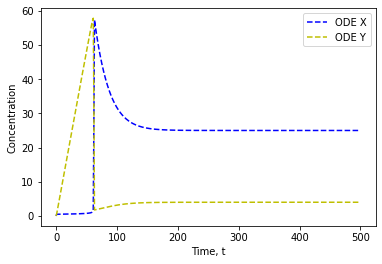

In [37]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# The chemical equations in Task 1
def model(initial_vals,t):
    x = initial_vals[0]
    y = initial_vals[1]
    dxdt = 1 + (0.02 * x * x * y) - (2.04 * x)
    dydt = (2 * x) - (0.02 * x * x * y)
    return [dxdt, dydt]

# Starting from 0 reaction time units 
initial_vals = [0, 0]

# Time units for the equation
t = np.linspace(0, 500, 500)

# Solve ODE
# odeint required inputs:
# 1. A function that returns derivative values.
# 2. Initial conditions of the differential states.
# 3. Time points at which the solution should be reported.
y = odeint(model, initial_vals, t)

# Plot results
plt.plot(t,y[:,0],'b--')
plt.plot(t,y[:,1],'y--')
plt.xlabel('Time, t')
plt.ylabel('Concentration')
plt.legend(['ODE X','ODE Y'])
plt.show()

As seen in the figure above, X is initially being produced at a rate of 1 (from t=0 to t≈55).<br>
But X is also being coverted into Y at the rate of 2, this can be seen by the steep and steady rise in Y (from t=0 to t≈55).<br>
Once Y concentration reaches a threshold of t≈55, it starts to mix with X. The production of X then increases instantaneously (2 X + Y → 3 X at rate 0.02).<br>
When Y almost runs out (concentration≈2), X reaches a steady state in a rate of 0.04 (X → ∅ at rate 0.04).
<br>

The solution to the differential equation of X reaches a steady state when the concentration is approximately 25.<br>
The solution to the differential equation of Y reaches a steady state when the concentration is approximately 4.

<br><h2><center>Task 3</h2>

Write a Gillespie algorithm to simulate the same four chemical equation and plot the results for 500 time units (note that this is a lot of data to plot and you might want to save and plot the data only after X or Y have changed in number by at least 5.


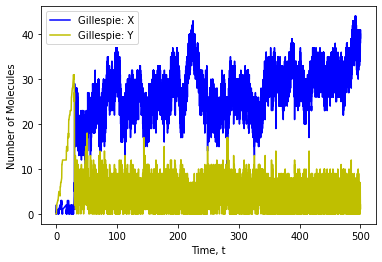

In [70]:
import math
import random as r

# Moles in X and in Y
moles = {'X' : 0, 'Y' : 0}

# The moles of X and Y at each time step
countAtT = []

# Time steps
t = 0
dt = 0

def init():
    pass

# Definitions of the chemical equations (reactions) in Task 1
# ∅ → X at a rate 1
def reaction1():
    moles["X"] += 1

# X → Y at rate 2
def reaction2():
    moles["X"] -= 1
    moles["Y"] += 1

# 2 X + Y → 3 X at rate 0.02
def reaction3():
    moles["X"] -= 2
    moles["Y"] -= 1
    moles["X"] += 3

# X → ∅ at rate 0.04
def reaction4():
    moles["X"] -= 1

# All chemical reactions for random picking
reactions = [reaction1, reaction2, reaction3, reaction4]
    
# Save the moles of X and Y at each time step, including the time step
def addChange(t):
    countAtT.append([t, moles["X"], moles["Y"]])

# Calculate total propensity
def getTotalPropensity():
    # Propensities for each reaction
    prop = [1, 2 * moles['X'], 0.02 * ((moles['X'] * moles['X']) * moles['Y']), 0.04 * moles['X']]
    total_prop = sum(prop)
    return total_prop

# Get a list of propensities for X and Y, divided by total propensity
def getProbabilities():
    prop = [1, 2 * moles['X'], 0.02 * ((moles['X'] * moles['X']) * moles['Y']), 0.04 * moles['X']]
    total_prop = sum(prop)
    return [p/total_prop for p in prop]

next_reaction = init
# 500 time units
while t < 500:
    # Draw a random time
    dt = -math.log(r.uniform(0.0, 1.0)) / getTotalPropensity()
    next_reaction()
    # Select the next reaction at random
    next_reaction = r.choices(population = reactions, weights = getProbabilities(), k = 1)[0]
    addChange(t)
    t = t + dt

plt.plot([x[0] for x in countAtT], [x[1] for x in countAtT], 'b')
plt.plot([x[0] for x in countAtT], [x[2] for x in countAtT], 'y')
plt.xlabel('Time, t')
plt.ylabel('Number of Molecules')
plt.legend(['Gillespie: X','Gillespie: Y'])
plt.show()

As expected, the Gillespie simulation produces more 'noisy' results.

The Gillespie algorithm simulates reactions with small numbers of molecules, producing much greater variance.
The seemingly random jumps significantly from the ODE results.